In [1]:
import ssl

import numpy as np
import pandas as pd
import tensorflow as tf
from   tensorflow.keras import Input, Model, Sequential
from   tensorflow.keras.layers import (
    CategoryEncoding, Concatenate, Dense, Normalization, StringLookup)
from   tensorflow.keras.losses import MeanSquaredError
from   tensorflow.keras.optimizers import Adam
from   tensorflow.keras.utils import plot_model

In [2]:
np.set_printoptions(precision=3, suppress=True)
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
abalone_train = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/'
    'abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 
           'shucked weight', 'Viscera weight', 'Shell weight', 'Age'])
abalone_train.head()

,Length,Diameter,Height,Whole weight,shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [5]:
abalone_model = Sequential([Dense(64), Dense(1)])
abalone_model.compile(loss=MeanSquaredError(), optimizer=Adam())
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 481us/step - loss: 62.4671
Epoch 2/10
104/104 [==============================] - 0s 458us/step - loss: 12.1408
Epoch 3/10
104/104 [==============================] - 0s 456us/step - loss: 8.7552
Epoch 4/10
104/104 [==============================] - 0s 465us/step - loss: 8.2369
Epoch 5/10
104/104 [==============================] - 0s 461us/step - loss: 7.7703
Epoch 6/10
104/104 [==============================] - 0s 459us/step - loss: 7.3902
Epoch 7/10
104/104 [==============================] - 0s 455us/step - loss: 7.0905
Epoch 8/10
104/104 [==============================] - 0s 459us/step - loss: 6.8821
Epoch 9/10
104/104 [==============================] - 0s 454us/step - loss: 6.7295
Epoch 10/10
104/104 [==============================] - 0s 457us/step - loss: 6.6113


In [6]:
normalize = Normalization()
normalize.adapt(abalone_features)

In [7]:
norm_mod = Sequential([normalize, Dense(64), Dense(1)])
norm_mod.compile(loss=MeanSquaredError(), optimizer=Adam())
norm_mod.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 517us/step - loss: 92.7037
Epoch 2/10
104/104 [==============================] - 0s 476us/step - loss: 54.1975
Epoch 3/10
104/104 [==============================] - 0s 473us/step - loss: 16.9518
Epoch 4/10
104/104 [==============================] - 0s 470us/step - loss: 5.7797
Epoch 5/10
104/104 [==============================] - 0s 473us/step - loss: 4.9925
Epoch 6/10
104/104 [==============================] - 0s 481us/step - loss: 4.9513
Epoch 7/10
104/104 [==============================] - 0s 474us/step - loss: 4.9248
Epoch 8/10
104/104 [==============================] - 0s 477us/step - loss: 4.9253
Epoch 9/10
104/104 [==============================] - 0s 481us/step - loss: 4.9292
Epoch 10/10
104/104 [==============================] - 0s 471us/step - loss: 4.9046


In [8]:
titanic = pd.read_csv(
    'https://storage.googleapis.com/tf-datasets/titanic/train.csv')
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [9]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

In [10]:
input = Input(shape=(), dtype=tf.float32)
res = 2*input + 1
res

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [11]:
calc = Model(inputs=input, outputs=res)
calc(3).numpy()

7.0

In [12]:
inputs = {}
for name, col in titanic_features.items():
    dtype = col.dtype
    if dtype == object:
        dtype = tf.string
    else:
        dtype = tf.float32
    inputs[name] = Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

In [13]:
numeric_inputs = {name:input for name, input in inputs.items()
                  if input.dtype == tf.float32}
x = Concatenate()(list(numeric_inputs.values()))
norm = Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)
all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

In [14]:
preprocessed_inputs = [all_numeric_inputs]

In [15]:
for name, input in inputs.items():
    if input.dtype == tf.float32:
        continue
    lookup = StringLookup(vocabulary=np.unique(titanic_features[name]))
    one_hot = CategoryEncoding(num_tokens=lookup.vocabulary_size())
    x = lookup(input)
    x = one_hot(x)
    preprocessed_inputs.append(x)

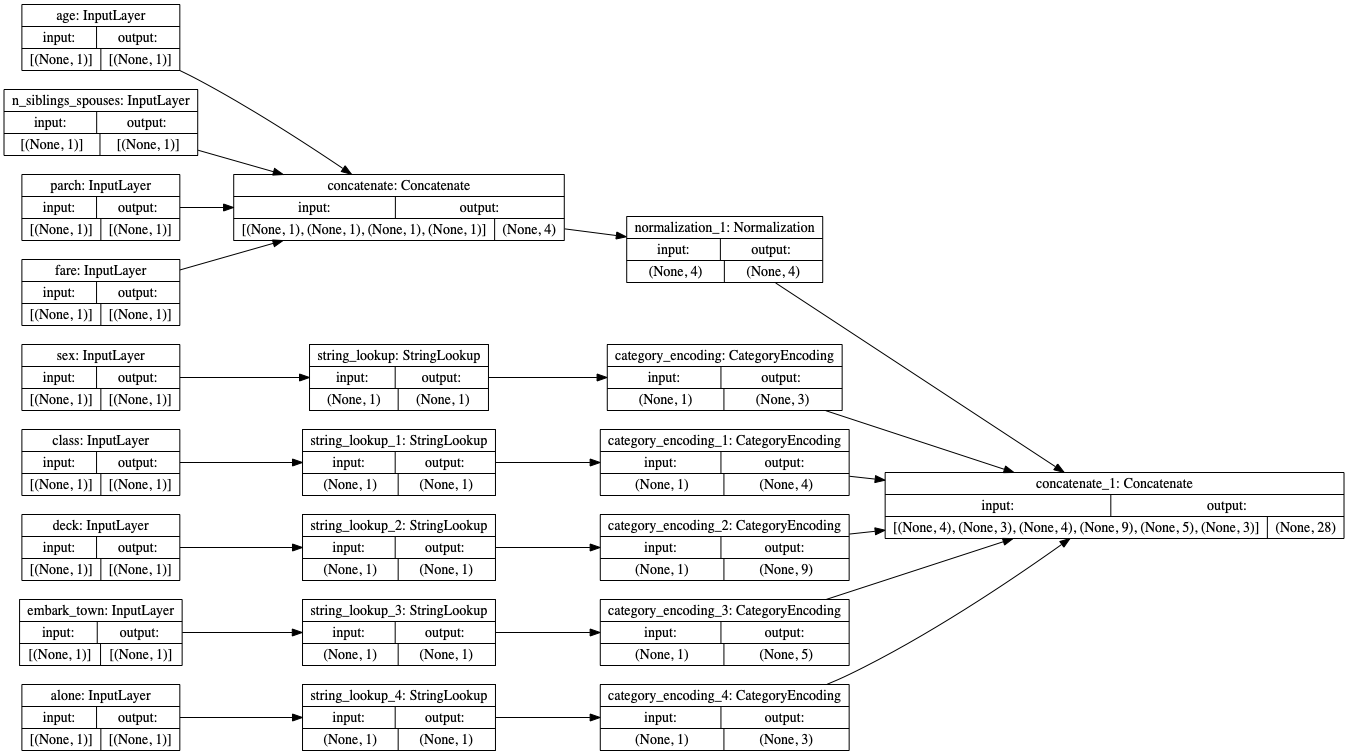

In [16]:
preprocessed_inputs_cat = Concatenate()(preprocessed_inputs)
titanic_preprocessing = Model(inputs, preprocessed_inputs_cat)
plot_model(
    model=titanic_preprocessing, rankdir='LR', dpi=72, show_shapes=True)

In [17]:
titanic_features_dict = {name: np.array(val) 
                         for name, val in titanic_features.items()}

In [19]:
features_dict = {name: vals[:1] 
                 for name, vals in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

In [21]:
def titanic_model(preprocessing_head, inputs):
    body = Sequential([Dense(64), Dense(1)])
    preprocessed_inputs = preprocessing_head(inputs)
    res = body(preprocessed_inputs)
    mod = Model(inputs, res)
    mod.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=Adam())
    return mod

In [22]:
titanic_model = titanic_model(titanic_preprocessing, inputs)
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 1ms/step - loss: 0.6113
Epoch 2/10
20/20 [==============================] - 0s 986us/step - loss: 0.5278
Epoch 3/10
20/20 [==============================] - 0s 978us/step - loss: 0.4853
Epoch 4/10
20/20 [==============================] - 0s 962us/step - loss: 0.4616
Epoch 5/10
20/20 [==============================] - 0s 956us/step - loss: 0.4465
Epoch 6/10
20/20 [==============================] - 0s 987us/step - loss: 0.4362
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4303
Epoch 8/10
20/20 [==============================] - 0s 979us/step - loss: 0.4269
Epoch 9/10
20/20 [==============================] - 0s 965us/step - loss: 0.4244
Epoch 10/10
20/20 [==============================] - 0s 953us/step - loss: 0.4216


In [23]:
#titanic_model.save('test')
#reloaded = tf.keras.models.load_model('test')

In [24]:
#features_dict = {names: vals[:1] 
#                 for name, vals in titanic_features_dict.items()}
#before = titanic_model(features_dict)
#after = reloaded(features_dict)
#assert (abs(before - after)) < 1e-3
#print(before, '\n', after)

### `tf.data`